안녕하세요 [Mulcamer] 팀입니다.

저희 팀은 삼성 멀티캠퍼스에서 BigData/AI 설계 과정을 수강하는 학생들입니다.

첫 번째 단계로 plotly와 tableu를 활용한 EDA와 시각화를 진행했습니다.

분석 내석 내용을 바탕으로 데이터의 특징과 코로나에 대한 분석 방향을 모색했습니다.

이번 포스팅은 먼저 20대의 감염 원인과 행동 패턴에 대해서 알아보았습니다.

유익하고 재밌으셨다면 투표한번씩 부탁드립니다. ^=^  

감사합니다.

---

# 이전 글 [Version_1 : Tableau & Plotly 활용 전반적 EDA 와 시각화](https://dacon.io/competitions/official/235590/codeshare/1001)

(4월 22일) COVID-19 Plotly를 사용한 전반적 EDA

(4월 23일) 시간에 따른 세계 확진자 추이 TABLEU

(4월 24일) 시간에 따른 한국 확진자 추이 TABLEU

(4월 26일) EDA 결과 및 특징을 통한 분석 방향 확립

(4월 29일) 1차 분석 : 20대 감염 원인과 성향

In [265]:
# essential libraries
import os
import math
from datetime import datetime as dt

# storing and anaysis
import numpy as np
import pandas as pd

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import calmap 
import folium 
from PIL import Image

# converter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()   

#한글깨짐 방지(0420)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#pandas와 같이 plotly에서도 간단한 시각화 지원
import cufflinks as cf
cf.go_offline(connected=True)

# for offline ploting
# ===================
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.io as pio
pio.renderers.default = "notebook_connected"

In [269]:
case = pd.read_csv("Case.csv")
region = pd.read_csv("Region.csv")
patientinfo = pd.read_csv("PatientInfo.csv")
region = pd.read_csv("Region.csv")
route = pd.read_csv( 'PatientRoute.csv')
timeProve = pd.read_csv("TimeProvince.csv")
timeAge = pd.read_csv("TimeAge.csv")
seoulFloating = pd.read_csv('SeoulFloating.csv')

# 1. 20대 감염자 어디서 왔는가?!

## 가설 1. 20대의 유동인구가 많을 것이다.

## 가설 2. 20대가 코로나에 더 덜 신경쓴다.

## ? 

In [270]:
fig = px.scatter(timeAge, x='date', y='confirmed',
             hover_data=['age'], color='age', )

fig.update_layout(title='<b>연령별 확진자 추이</b>', **layout_setting)
fig.show()

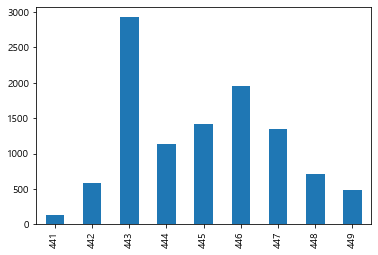

In [82]:
confirmedAge = timeAge[timeAge['date'] == '2020-04-20']['confirmed']
confirmedAge.plot.bar()

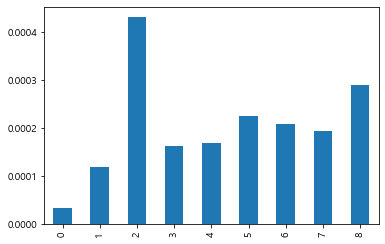

In [78]:
import re

population = pd.read_csv("202003Korea_Population.csv", encoding='ANSI')
cols = list(population.columns)
cols = list(map(lambda x : x[9:] if len(x) > 9 else x, cols))
population.columns = cols
pops = population.iloc[0,3:12]
cons = timeAge[timeAge['date'] == '2020-04-20']['confirmed']
for i, pop in enumerate(pops.values):
    pops[i] = int(pop.replace(',',""))
pd.Series(np.array(cons) / np.array(pops)).plot.bar()

인구수 대비 비율로 보아도 확실히 20대의 확진자 수가 높은 것을 확인할 수 있다.
확진자 비율에서 80대 이상의 확진자의 비율이 매우 높은 것을 볼 수 있다.
but 데이터의 수 자체가 매우 적어서 신뢰도가 낮다.

## 가설 1. 20대의 유동인구가 많을 것이다.

서울 유동인구를 통해서 20대의 유동인구를 파악해보겠습니다.

>> 전국 인구에 대한 유동인구 데이터 >> 찾아서 있으면 그것 사용하면 좋을 듯 

없다면 >
한국의 코로나가 심각하게 퍼지게된 계기의 시작은 대구의 신천지에서 비롯된 것입니다. 
10738명의 확진자중 약 3600명이 신천지 교인이였으모 전체 확진자의 64% 대구 13% 경북이며 경상지방의 전체적인 확진자는
신천지가 시초라고 봐도 무방할 정도이므로 서울에 유동인구를 중심으로 20대의 행동성향을 파악해도 크게 무방할 것으로 판단하였습니다.

---

https://www.google.com/search?q=20%EB%8C%80+%EC%82%AC%ED%9A%8C%EC%A0%81+%EA%B1%B0%EB%A6%AC%EB%91%90%EA%B8%B0+%EC%8B%A4%EC%B2%9C&oq=20%EB%8C%80+%EC%82%AC%ED%9A%8C%EC%A0%81+%EA%B1%B0%EB%A6%AC%EB%91%90%EA%B8%B0+%EC%8B%A4%EC%B2%9C&aqs=chrome..69i57.9518j0j7&sourceid=chrome&ie=UTF-8
20대 사회적 거리두기 참여율 낮아

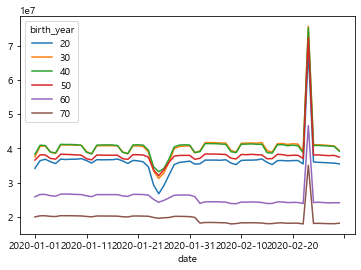

In [111]:
fp_age = pd.pivot_table(seoulFloating, index='date',columns='birth_year',values='fp_num', aggfunc=sum)
fp_age.plot()

# 그 외우 줄어든 날짜 
# 1월 25일 : 1월 25일 대한민국 외교부는 중국 우한시를 포함한 후베이성 전역의 여행경보 철수권고(적색경보)로 변경했고,[33] 미국 정부가 약 230명 정원의 전세기를 동원해 우한 주재 미국 영사관에 파견된 외교관들을 귀국시키는 방안을 추진하고 있는 것으로 확인되었다 . 그리고 일시적으로 해당 영사관이 폐쇄되었다.[34]
# https://ko.wikipedia.org/wiki/%EC%BD%94%EB%A1%9C%EB%82%98%EB%B0%94%EC%9D%B4%EB%9F%AC%EC%8A%A4%EA%B0%90%EC%97%BC%EC%A6%9D-19_%EB%B2%94%EC%9C%A0%ED%96%89%EC%9D%98_%EA%B2%BD%EA%B3%BC#1%EC%9B%94_25%EC%9D%BC

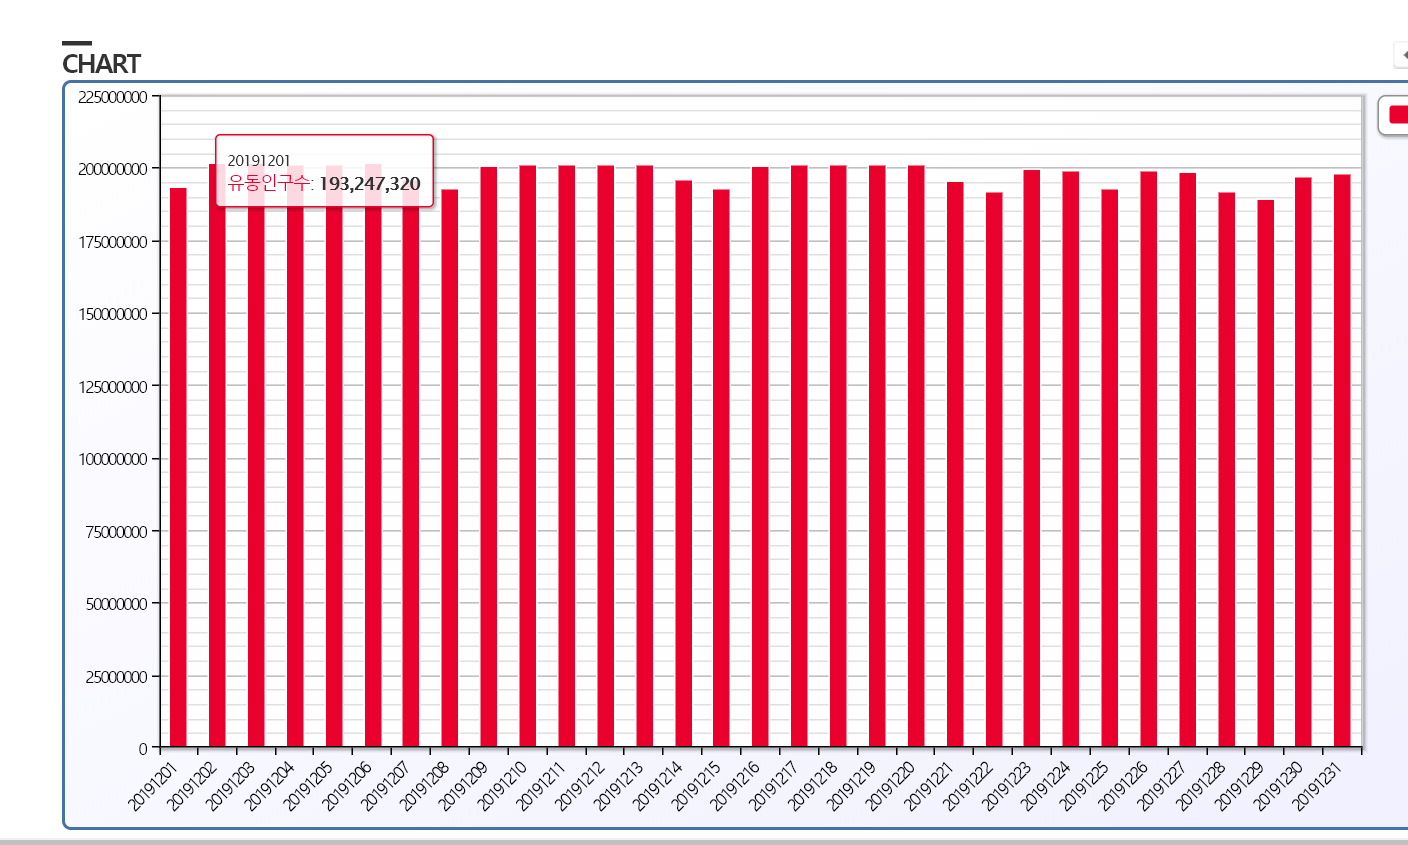
토욜 일욜이 원래 낮아지는 추세

2월 23일의 데이터를 이상치로 판단하는 것이 옳다고 생각됨

https://www.bigdatahub.co.kr/product/view.do?pid=1002280
sk big data hub 에서 서울시 유동인구
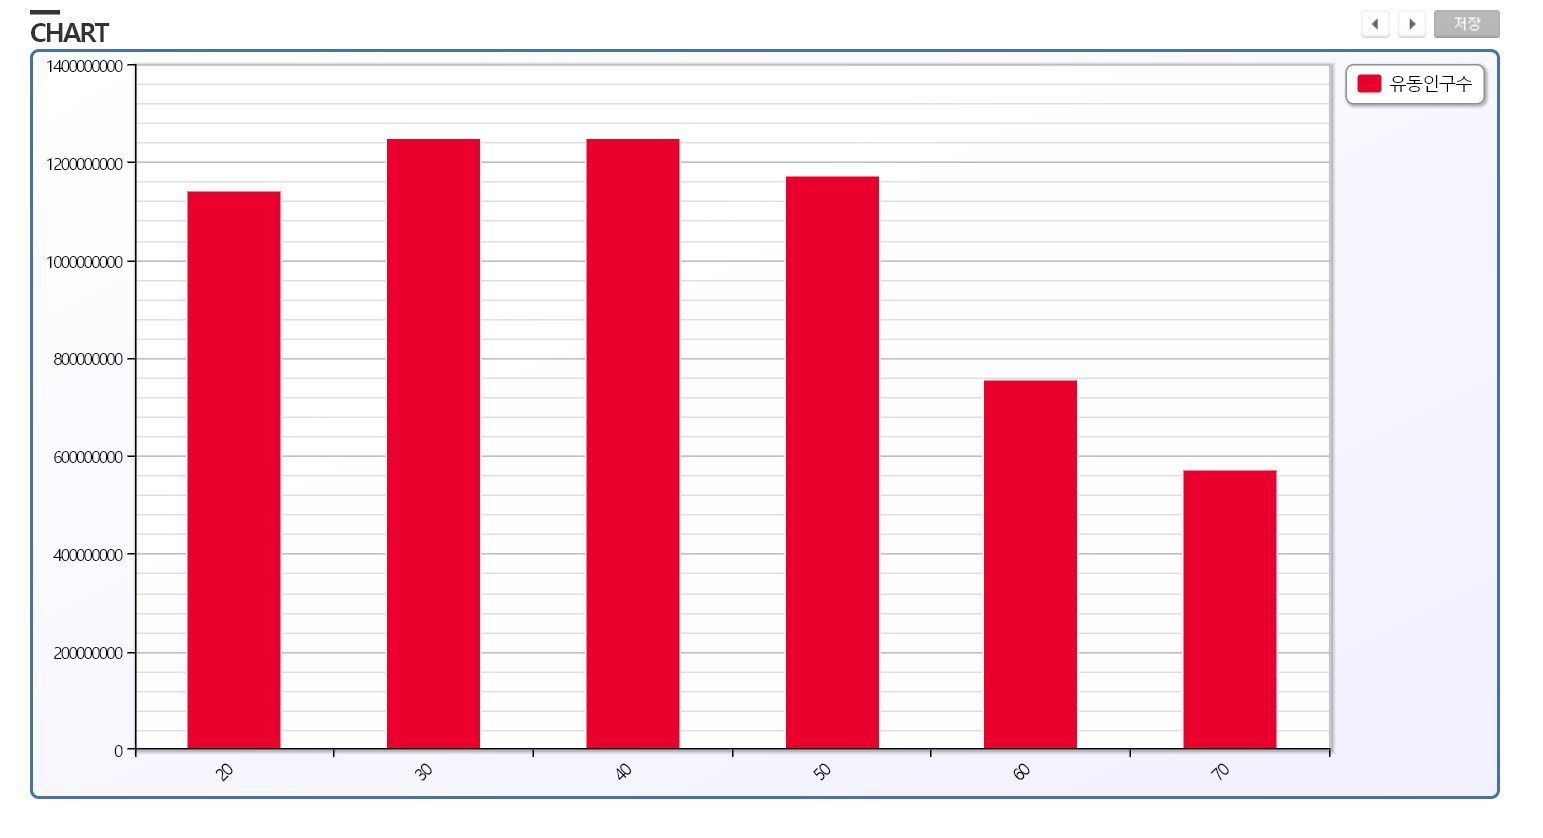
일반적으로 30 40 대가많아

SK 데이터 활용 api

In [1]:
from bs4 import BeautifulSoup
import requests
from urllib.parse import urlencode
from urllib.parse import quote_plus
from urllib.request import urlopen
import sqlite3

In [246]:
base_url = "https://api.bigdatahub.co.kr/v1/datahub/datasets/search.json"
url = "https://api.bigdatahub.co.kr/v1/datahub/datasets/search.json?TDCAccessKey={}&pid=1002291"
page = "&$page={}"
count = "&$count={}"
private_Key = "ce05a26bfe95d56be0f709b10e71d5a6c19cf99a97213ea57fc6252c1af322a9"

total_url = (url+page+count).format(private_Key,3000,50)

req = requests.get(total_url)
html = req.text
soup = BeautifulSoup(html, 'html.parser')
data = req.json()

In [249]:
p = "https://api.bigdatahub.co.kr/v1/datahub/datasets/search.json?TDCAccessKey=ce05a26bfe95d56be0f709b10e71d5a6c19cf99a97213ea57fc6252c1af322a9&pid=1002291"
req = requests.get(p+"&$page=3"+"&$count=2"+"&$select=년")
html = req.text
soup = BeautifulSoup(html, 'html.parser')
data = req.json()

In [250]:
req.json()

{'totalResult': 208800,
 'page': '3',
 'count': 2,
 'entry': [{'일자': '20200201',
   '시간(1시간단위)': '02',
   '연령대(10세단위)': '40',
   '성별': '남성',
   '시': '서울',
   '군구': '도봉구',
   '유동인구수': '25320'},
  {'일자': '20200201',
   '시간(1시간단위)': '02',
   '연령대(10세단위)': '40',
   '성별': '여성',
   '시': '서울',
   '군구': '동대문구',
   '유동인구수': '26400'}]}

In [31]:
base_url + queryParams

'https://api.bigdatahub.co.kr/v1/datahub/datasets/search.json?TDCAccessKey=ce05a26bfe95d56be0f709b10e71d5a6c19cf99a97213ea57fc6252c1af322a9&pid=1000153&select=%EB%85%84'

In [230]:
params = urlencode({'TDCAccessKey' : 'ce05a26bfe95d56be0f709b10e71d5a6c19cf99a97213ea57fc6252c1af322a9',
         'pid' : 1002291, # 1002261
         '$page' : 2,
         '$count' : 3000,
         '$select' : '일자,성별,시간(1시간단위),연령대(10세단위),군구,유동인구수',
         '$where' : '일자 = 20191010 AND 시간(1시간단위) = 18 AND 성별 = 남성'
                   })

In [231]:
requests.get(url=base_url, params=params).json()

data = requests.get(url=base_url, params=params).json()

df = pd.DataFrame(data['entry'])

In [232]:
df['유동인구수'] = df['유동인구수'].astype(int)

KeyError: '유동인구수'

In [184]:
df.pivot_table(index='일자', columns='연령대(10세단위)',values='유동인구수')

연령대(10세단위),20,30,40,50,60,70
일자,,,,,,
20191010,31139.6,35522.4,35136.8,30819.6,19058.4,12842.4


In [251]:
DB = pd.DataFrame()
for i in range(1,3001):
    total_url = (url+page+count).format(private_Key,i,300)
    req = requests.get(total_url)
    html = req.text
    soup = BeautifulSoup(html, 'html.parser')
    data = req.json()
    if data['entry'] == [] : break
    db = pd.DataFrame(data['entry'])
    DB = pd.concat([DB, db])
DB.info

<bound method DataFrame.info of            일자 시간(1시간단위) 연령대(10세단위)  성별   시    군구  유동인구수
0    20200201        00         60  여성  서울   은평구  29130
1    20200201        00         60  여성  서울   중랑구  24880
2    20200201        00         70  남성  서울  동대문구  14740
3    20200201        01         40  여성  서울   양천구  43140
4    20200201        02         40  남성  서울   도봉구  25320
..        ...       ...        ...  ..  ..   ...    ...
295  20200229        22         60  남성  서울   관악구  24560
296  20200229        22         70  남성  서울   강남구  14840
297  20200229        23         20  여성  서울  영등포구  29960
298  20200229        23         30  여성  서울  영등포구  34390
299  20200229        23         50  여성  서울  영등포구  35190

[208800 rows x 7 columns]>

In [252]:
con = sqlite3.connect(r"Q:\Python_Data\sk_data_hub\floating_data_2020_02.db")

In [255]:
DB.to_sql('moving_2020', con)

In [256]:
df = pd.read_sql("SELECT * FROM moving_2020", con, index_col=None)

In [257]:
df.head()

,index,일자,시간(1시간단위),연령대(10세단위),성별,시,군구,유동인구수
0,0,20200201,00,60,여성,서울,은평구,29130
1,1,20200201,00,60,여성,서울,중랑구,24880
2,2,20200201,00,70,남성,서울,동대문구,14740
3,3,20200201,01,40,여성,서울,양천구,43140
4,4,20200201,02,40,남성,서울,도봉구,25320


In [258]:
df.drop(['index'], axis=1, inplace=True)

In [259]:
df['유동인구수'] = df['유동인구수'].astype(int)

In [260]:
df

,일자,시간(1시간단위),연령대(10세단위),성별,시,군구,유동인구수
0,20200201,00,60,여성,서울,은평구,29130
1,20200201,00,60,여성,서울,중랑구,24880
2,20200201,00,70,남성,서울,동대문구,14740
3,20200201,01,40,여성,서울,양천구,43140
4,20200201,02,40,남성,서울,도봉구,25320
...,...,...,...,...,...,...,...
208795,20200229,22,60,남성,서울,관악구,24560
208796,20200229,22,70,남성,서울,강남구,14840
208797,20200229,23,20,여성,서울,영등포구,29960
208798,20200229,23,30,여성,서울,영등포구,34390


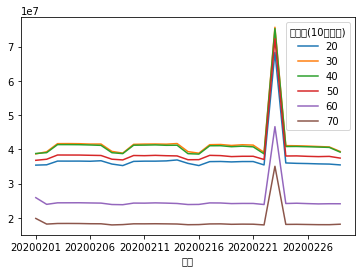

In [261]:
df.pivot_table(index='일자', columns='연령대(10세단위)', 
               values='유동인구수', aggfunc='sum').plot()

일반적으로 20의 유동인구가 가장 많은 것은 아니라는 것을 알 수 있습니다.

In [262]:
import warnings
warnings.filterwarnings(action='ignore')

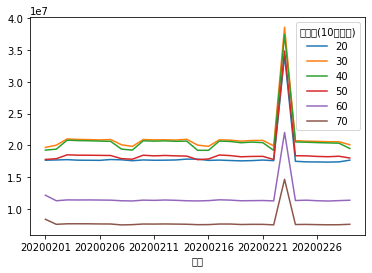

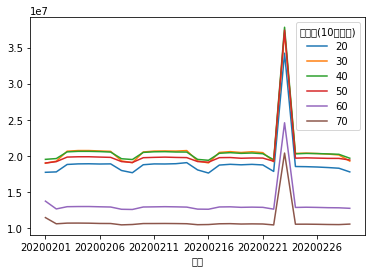

In [263]:
df2 = df.pivot_table(index=['일자'], columns=['성별','연령대(10세단위)'], 
                   values='유동인구수', aggfunc='sum')
df2['남성'].plot()
df2['여성'].plot()

일단 그렇다면 유동성 떄문은 아닌 것으로 생각할 수 있음

=>> 오히려 평일에는 출퇴근하는 직장인들의 영향으로 30,40대의 유동인구가 더 높게 나오는 것으로 생각할 수 있습니다.


# 다음으로 환자 info 데이터

환자들의 접촉 경로를 통해서 어느부분에서 접촉이 많았는지 확인해보겠습니다.


In [271]:
patientinfo['infection_case'].value_counts()

contact with patient                     949
etc                                      567
overseas inflow                          567
Guro-gu Call Center                      112
Shincheonji Church                       107
Onchun Church                             33
Bonghwa Pureun Nursing Home               31
gym facility in Cheonan                   30
Ministry of Oceans and Fisheries          28
Cheongdo Daenam Hospital                  21
Dongan Church                             17
Eunpyeong St. Mary's Hospital             16
Gyeongsan Seorin Nursing Home             15
Seongdong-gu APT                          13
Gyeongsan Jeil Silver Town                12
Milal Shelter                             11
Gyeongsan Cham Joeun Community Center     10
Geochang Church                            6
gym facility in Sejong                     4
Changnyeong Coin Karaoke                   4
Suyeong-gu Kindergarten                    3
Pilgrimage to Israel                       2
River of G

0s


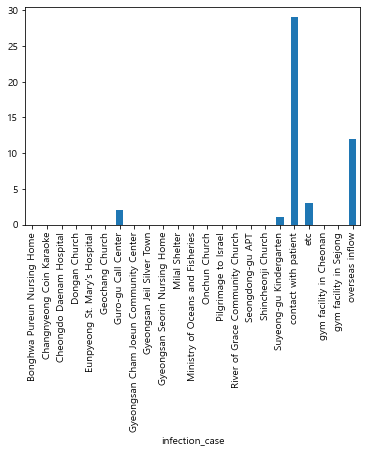

100s


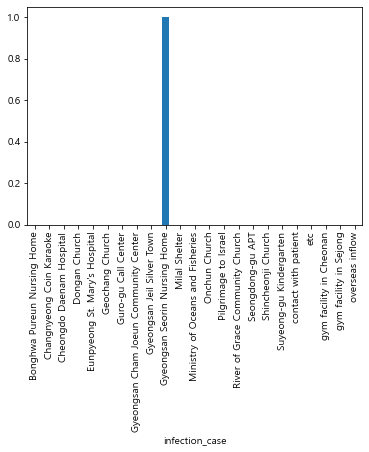

10s


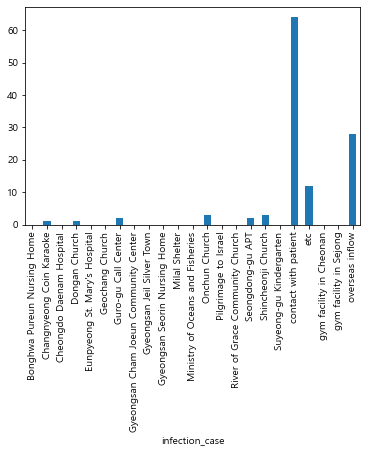

20s


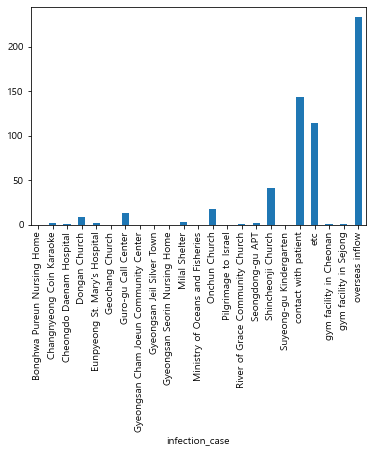

30s


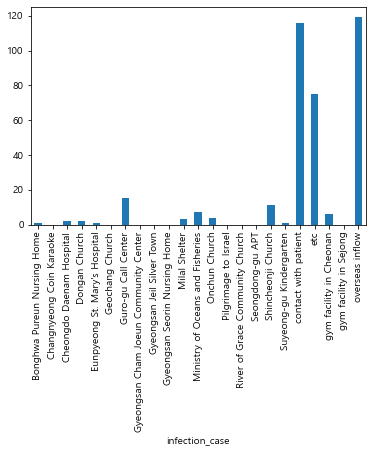

40s


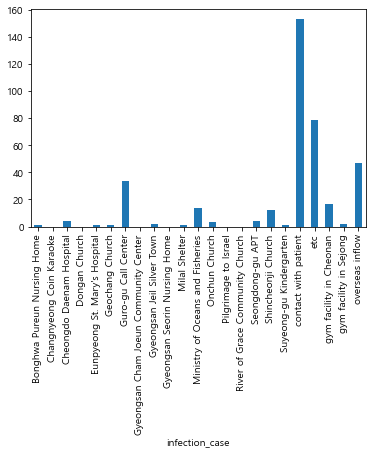

50s


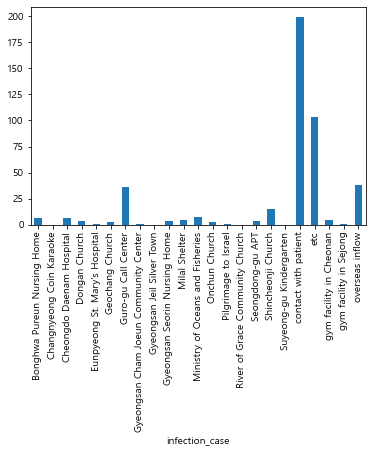

60s


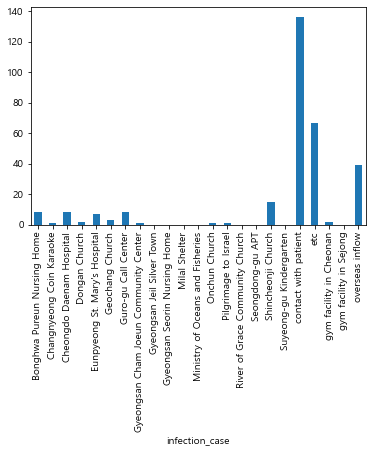

70s


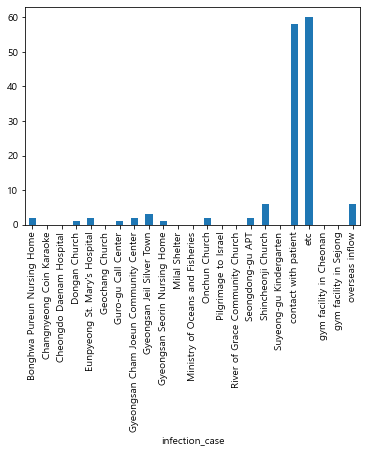

80s


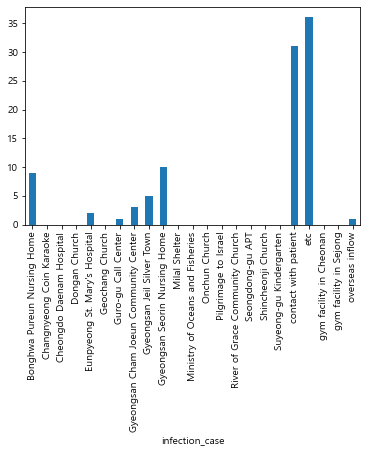

90s


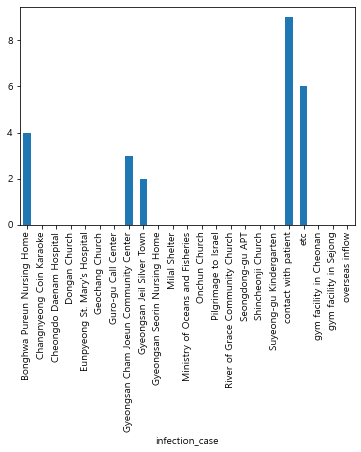

In [426]:
infectionCase = patientinfo.pivot_table(index='infection_case',columns='age',values='patient_id', aggfunc='count')
for col in infectionCase.columns:
    print(col)
    infectionCase[col].plot(kind='bar')
    plt.show()

etc는 아직 분류되지 않은 경우이거나 다른 기타 케이스이므로 제외 /
전반적으로 patient_contact가 가장 많음
반면 20대는 해외 유입이 대다수 / 30대는 반반
해외 유입을 통해서 -> 많은 코로나 환자들이 발생한다. -> 해외 유입에 대한 제재가 필요한 시점
해외 외국인 입국 금지를 했지만 대부분의 해외 유입 확진자는 내국인의 case임
>>> 이부분 데이터 필요


자가격리 14일을 아주 효과적인 대처, 우수하다.
하지만 더욱 강력한 격리가 필요할 수도 있다고 생각된다.

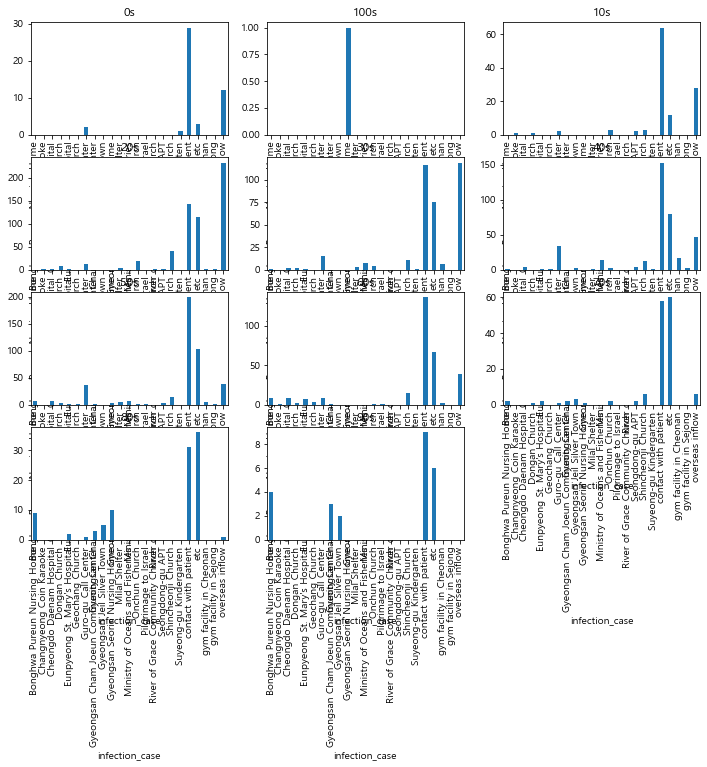

In [311]:
InfectionAge = patientinfo.pivot_table(index='infection_case', columns='age', values='patient_id', aggfunc='count').fillna(0)
InfectionAge
# plt.plot.bar(InfectionAge['10s'])

plt.figure(figsize=(12,12))
for i,col in enumerate(InfectionAge.columns):
    plt.subplot(5,3,i+1) #(5,3,1),...,(5,3,15)
    InfectionAge[col].plot(kind='bar')
    plt.title(col)
plt.tight_layout()
plt.show()

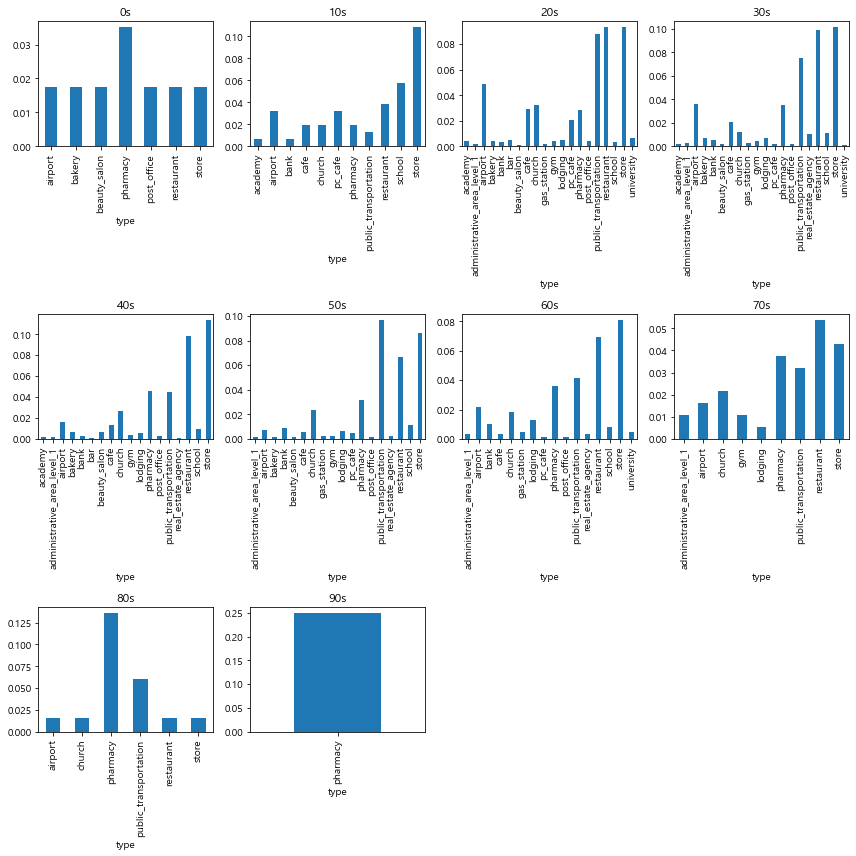

In [394]:
route
patientinfo
pinfoANDroute = pd.merge(route, patientinfo,on='patient_id').pivot_table(index='type', columns=['age'], values='patient_id', aggfunc='count')
# for col in pinfoANDroute.columns:
#     print(col)
#     (pinfoANDroute[col].dropna()/sum(pinfoANDroute[col].dropna())).plot(kind='bar')
#     plt.show()
plt.figure(figsize=(12,12))
for i, col in enumerate(pinfoANDroute.columns):
    plt.subplot(3,4,i+1)
    x = (pinfoANDroute[col].dropna()/sum(pinfoANDroute[col].dropna()))
    x = x.drop(['etc','hospital'], axis=0)
    x.plot(kind='bar')
    plt.title(col)
plt.tight_layout()
plt.show()

In [405]:
from sklearn.preprocessing import MinMaxScaler


test = pinfoANDroute.fillna(0)
test

scaler = MinMaxScaler()
test = scaler.fit_transform(test)
pd.DataFrame(test).describe()

,0,1,2,3,4,5,6,7,8,9
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,0.079944,0.093508,0.163999,0.154412,0.134808,0.126782,0.115056,0.103679,0.068323,0.086957
std,0.233604,0.218307,0.282476,0.284962,0.267811,0.265596,0.255509,0.260570,0.210807,0.245513
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.013064,0.009191,0.005917,0.005420,0.004367,0.000000,0.000000,0.000000
50%,0.000000,0.013699,0.019002,0.025735,0.020710,0.016260,0.013100,0.000000,0.000000,0.000000
75%,0.032258,0.068493,0.153207,0.126838,0.110947,0.079946,0.076419,0.064103,0.023810,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


20대와 30대의 분포도가 높은 것을 확인할 수 있음
즉 20대와 30대가 여기저기 돌아다닌 것이라고 생각할 수 있음?
    병원과 약국을 제외하고 분산을 봐보자

In [419]:
test = pinfoANDroute
test = test.drop(['hospital'])

scaler = MinMaxScaler()
for col in test.columns:
    print(col, ':', test[col].dropna().std())
    



0s : 5.970163912561961
10s : 8.213071621174715
20s : 97.13645287012736
30s : 62.52450947999741
40s : 79.81715215276587
50s : 85.79425954433219
60s : 54.53607818251521
70s : 19.268858006869245
80s : 3.3594217189442417
90s : 0.0


20대의 이동 루트에 대한 분산이 매우 높은 것을 볼 수 있다.
여러 방면에서 20대가 많이 돌아다니는 것을 확인할 수 있습니다.

부산 클럽 : http://www.donga.com/news/article/all/20200427/100819220/2
강남 클럽 : https://news.joins.com/article/23735119
놀이공원 :  https://www.nocutnews.co.kr/news/5322407
등의 뉴스를 보았을 때, 20대들의 코로나 사회적 거리두기를 실천하지 않는 모습을 확인해 볼 수 있습니다.
매일 스벅녀 : https://www.nocutnews.co.kr/news/5325329


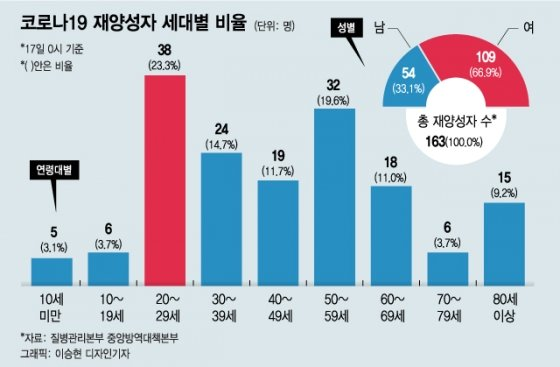
https://news.mt.co.kr/mtview.php?no=2020041714043594627
심지어 코로나 다시 걸리는 비율도 많아

http://www.medigatenews.com/news/2268337473
재양성자 비율 

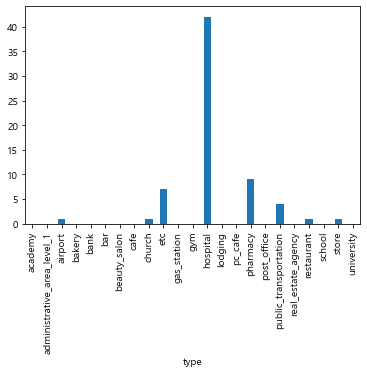

In [412]:
pinfoANDroute['80s'].plot.bar()

이동 경로의 종류도 훨씬 많은 뿐 아니라
그 분산도 상당히 높은 편

20대의 활동 범위가 훨씬 넓은 것을 확인할 수 있습니다.

In [370]:
dd = pd.merge(route, patientinfo,on='patient_id').pivot_table(index='type', columns=['age'], values='patient_id', aggfunc='count').fillna(0)
pinfoANDroute = pd.merge(route, patientinfo,on='patient_id').pivot_table(index='age', columns=['type'], values='patient_id', aggfunc='count')
pinfoANDroute.loc['20s']
pinfoANDroute.loc['30s']
pinfoANDroute.loc['40s']
pinfoANDroute.loc['50s']
pinfoANDroute.loc['60s'].dropna()

type
administrative_area_level_1      2.0
airport                         13.0
bank                             6.0
cafe                             2.0
church                          11.0
etc                            229.0
gas_station                      3.0
hospital                       182.0
lodging                          8.0
pc_cafe                          1.0
pharmacy                        22.0
post_office                      1.0
public_transportation           25.0
real_estate_agency               2.0
restaurant                      42.0
school                           5.0
store                           49.0
university                       3.0
Name: 60s, dtype: float64

academy


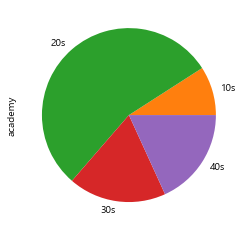

administrative_area_level_1


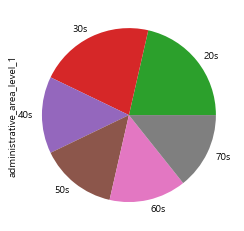

airport


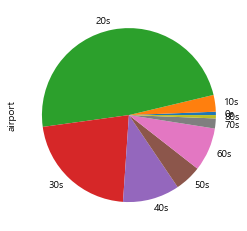

bakery


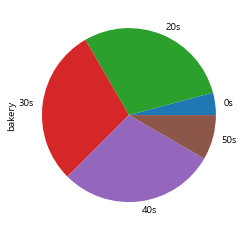

bank


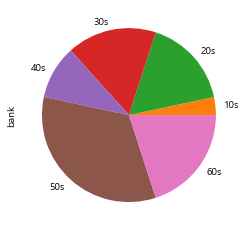

bar


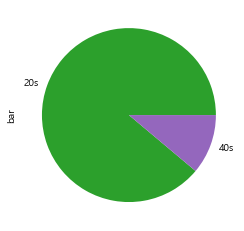

beauty_salon


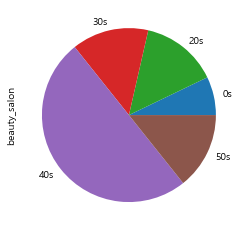

cafe


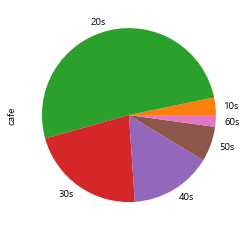

church


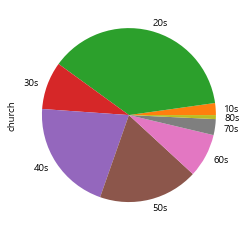

etc


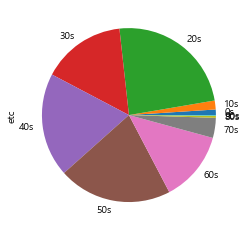

gas_station


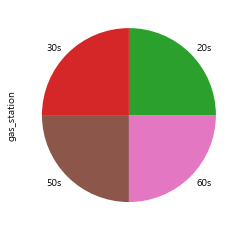

gym


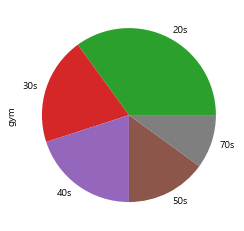

hospital


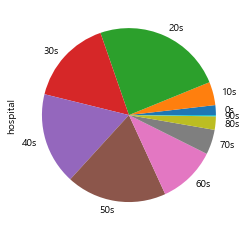

lodging


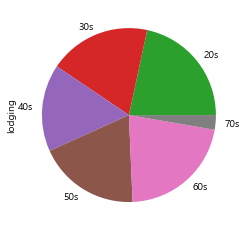

pc_cafe


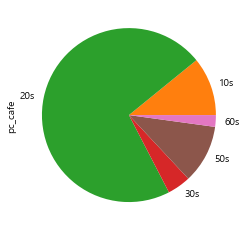

pharmacy


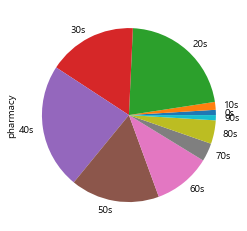

post_office


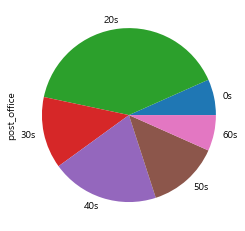

public_transportation


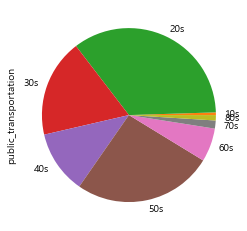

real_estate_agency


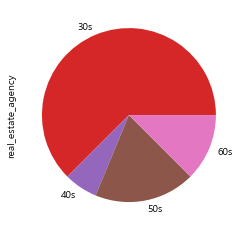

restaurant


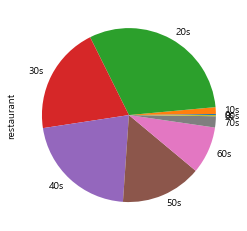

school


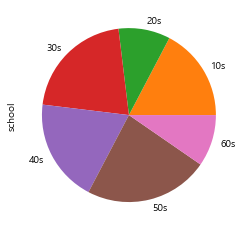

store


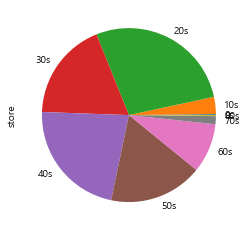

university


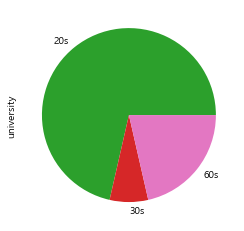

In [348]:
route
patientinfo
pinfoANDroute = pd.merge(route, patientinfo,on='patient_id').pivot_table(index='age', columns=['type'], values='patient_id', aggfunc='count').fillna(0)
for col in pinfoANDroute.columns:
    print(col)
    pinfoANDroute[col].plot(kind='pie')
    plt.show()

In [364]:
patientinfo.sort_values(by='contact_number', ascending=False)[:40]

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
753,1200000031,31.0,female,1959.0,60s,Korea,Daegu,NaN,NaN,Shincheonji Church,NaN,NaN,1160.0,NaN,2020-02-18,NaN,NaN,isolated
624,1100000001,NaN,male,2001.0,10s,Korea,Busan,Dongnae-gu,NaN,Onchun Church,NaN,NaN,1091.0,NaN,2020-02-21,NaN,NaN,released
630,1100000007,NaN,male,1994.0,20s,China,Busan,NaN,NaN,Shincheonji Church,NaN,NaN,485.0,NaN,2020-02-22,NaN,NaN,released
816,1300000001,16.0,female,NaN,40s,Korea,Gwangju,NaN,NaN,overseas inflow,NaN,NaN,450.0,2020-01-27,2020-02-03,2020-02-20,NaN,released
1067,2000000003,12.0,male,1971.0,40s,China,Gyeonggi-do,Bucheon-si,NaN,contact with patient,2.0,NaN,422.0,NaN,2020-02-01,2020-02-18,NaN,released
635,1100000012,NaN,female,1964.0,50s,Korea,Busan,Nam-gu,NaN,Shincheonji Church,NaN,NaN,296.0,NaN,2020-02-22,NaN,NaN,released
1070,2000000006,17.0,male,1982.0,30s,Korea,Gyeonggi-do,Guri-si,NaN,overseas inflow,2.0,NaN,290.0,NaN,2020-02-05,2020-02-12,NaN,released
1891,4100000090,NaN,male,1968.0,50s,Korea,Chungcheongnam-do,Cheonan-si,NaN,contact with patient,NaN,4.100000e+09,174.0,NaN,2020-03-05,2020-03-24,NaN,released
662,1100000039,NaN,male,1991.0,20s,Korea,Busan,Haeundae-gu,NaN,contact with patient,NaN,1.100000e+09,159.0,2020-02-19,2020-02-24,NaN,NaN,released
820,1300000005,210.0,male,NaN,30s,Korea,Gwangju,NaN,NaN,etc,NaN,NaN,156.0,NaN,2020-02-21,2020-03-16,NaN,released


In [108]:
fp_age.loc['2020-02-22',:]

birth_year
20    35458810
30    39129240
40    38687160
50    37049750
60    23910890
70    17966010
Name: 2020-02-22, dtype: int64

In [110]:
fp_age.loc['2020-02-23',:]/2

birth_year
20    34158665.0
30    37809000.0
40    37606930.0
50    36121485.0
60    23312595.0
70    17535100.0
Name: 2020-02-23, dtype: float64

In [107]:
fp_age.loc['2020-02-24',:]

birth_year
20    36037050
30    41096540
40    40828460
50    38062600
60    24209600
70    18115230
Name: 2020-02-24, dtype: int64

In [ ]:
x = pinfo[pinfo['province']=='Seoul'][['confirmed_date','patient_id','infection_case']]
print(x['infection_case'].unique())
x['infection_case']
pd.get_dummies(x['infection_case']).cumsum().plot()

In [113]:
pinfo['province'].unique()

array(['Seoul', 'Busan', 'Daegu', 'Gwangju', 'Incheon', 'Daejeon',
       'Ulsan', 'Sejong', 'Gyeonggi-do', 'Gangwon-do',
       'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do',
       'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do'],
      dtype=object)

In [118]:
pinfo[pinfo['province']=='Seoul'].groupby(['sex']).size()

sex
female    305
male      258
dtype: int64

In [117]:
pinfo[pinfo['province']=='Daegu'].groupby(['sex']).size()

sex
female    37
male      26
dtype: int64

In [134]:
pinfo[pinfo['province']=='Seoul'].groupby(['infection_case']).size()

infection_case
Dongan Church                     17
Eunpyeong St. Mary's Hospital     14
Guro-gu Call Center               95
Seongdong-gu APT                  13
Shincheonji Church                 3
contact with patient             136
etc                               97
overseas inflow                  249
dtype: int64

In [142]:
pd.DataFrame(pinfo[pinfo['province']=='Seoul'].groupby(['confirmed_date','infection_case']).count()).cu

patient_id  global_num  sex  birth_year  \
confirmed_date infection_case                                                  
2020-01-23     overseas inflow                1           1    1           1   
2020-01-30     contact with patient           1           1    1           1   
               overseas inflow                2           2    2           2   
2020-01-31     contact with patient           3           3    3           3   
2020-02-02     overseas inflow                1           1    1           1   
...                                         ...         ...  ...         ...   
2020-04-15     contact with patient           1           1    0           0   
               overseas inflow                1           1    0           0   
2020-04-16     contact with patient           1           1    0           0   
2020-04-17     overseas inflow                3           3    0           0   
2020-04-18     overseas inflow                1           1    0           0   

                                     age  country  province  city  disease  \
confirmed_date infection_case                                                
2020-01-23     overseas inflow         1        1         1     1        0   
2020-01-30     contact with patient    1        1         1     1        0   
               overseas inflow         2        2         2     2        0   
2020-01-31     contact with patient    3        3         3     3        0   
2020-02-02     overseas inflow         1        1         1     1        0   
...                                  ...      ...       ...   ...      ...   
2020-04-15     contact with patient    0        1         1     1        0   
               overseas inflow         0        1         1     1        0   
2020-04-16     contact with patient    0        1         1     1        0   
2020-04-17     overseas inflow         0        3         3     3        0   
2020-04-18     overseas inflow         0        1         1     1        0   

                                     infection_order  infected_by  \
confirmed_date infection_case                                       
2020-01-23     overseas inflow                     1            0   
2020-01-30     contact with patient                1            1   
               overseas inflow                     2            0   
2020-01-31     contact with patient                3            3   
2020-02-02     overseas inflow                     1            0   
...                                              ...          ...   
2020-04-15     contact with patient                0            1   
               overseas inflow                     0            0   
2020-04-16     contact with patient                0            1   
2020-04-17     overseas inflow                     0            0   
2020-04-18     overseas inflow                     0            0   

                                     contact_number  symptom_onset_date  \
confirmed_date infection_case                                             
2020-01-23     overseas inflow                    1                   1   
2020-01-30     contact with patient               1                   0   
               overseas inflow                    2                   1   
2020-01-31     contact with patient               3                   0   
2020-02-02     overseas inflow                    1                   0   
...                                             ...                 ...   
2020-04-15     contact with patient               0                   0   
               overseas inflow                    0                   0   
2020-04-16     contact with patient               0                   0   
2020-04-17     overseas inflow                    1                   0   
2020-04-18     overseas inflow                    1                   0   

                                     released_date  deceased_date  state  
confirmed_date infection_case   

In [183]:
pinfo[pinfo['province']=='Seoul'].groupby(['confirmed_date','infection_case']).count()['patient_id'].cumsum()
pd.DataFrame(pinfo[pinfo['province']=='Seoul'].groupby(['confirmed_date','infection_case']).count()['patient_id'])

patient_id
confirmed_date infection_case                  
2020-01-23     overseas inflow                1
2020-01-30     contact with patient           1
               overseas inflow                2
2020-01-31     contact with patient           3
2020-02-02     overseas inflow                1
...                                         ...
2020-04-15     contact with patient           1
               overseas inflow                1
2020-04-16     contact with patient           1
2020-04-17     overseas inflow                3
2020-04-18     overseas inflow                1

[181 rows x 1 columns]

['overseas inflow' 'contact with patient' 'Seongdong-gu APT' 'etc'
 "Eunpyeong St. Mary's Hospital" 'Shincheonji Church' 'Dongan Church'
 'Guro-gu Call Center']


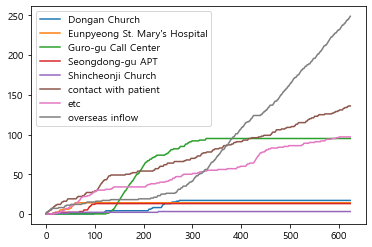

In [194]:
x = pinfo[pinfo['province']=='Seoul'][['confirmed_date','patient_id','infection_case']]
print(x['infection_case'].unique())
x['infection_case']
pd.get_dummies(x['infection_case']).cumsum().plot()

['Shincheonji Church' 'contact with patient' nan]


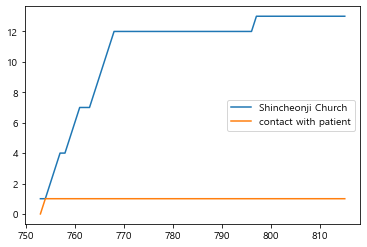

In [197]:
x = pinfo[pinfo['province']=='Daegu'][['confirmed_date','patient_id','infection_case']]
print(x['infection_case'].unique())
x['infection_case']
pd.get_dummies(x['infection_case']).cumsum().plot()

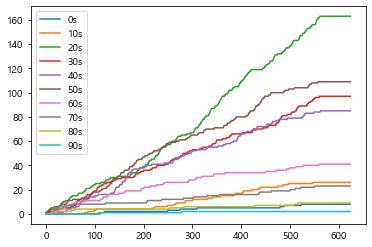

In [203]:
x = pinfo[pinfo['province']=='Seoul'][['confirmed_date','patient_id','infection_case','age']]
x['infection_case']
pd.get_dummies(x['age']).cumsum().plot()

TypeError: no numeric data to plot

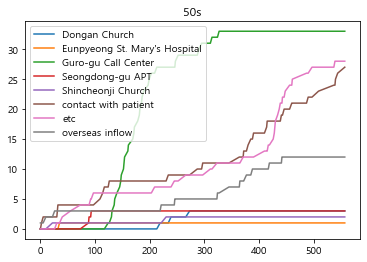

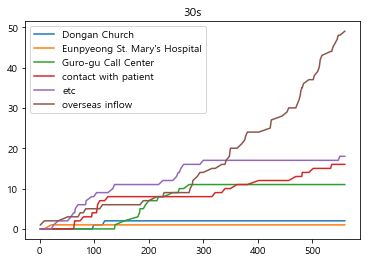

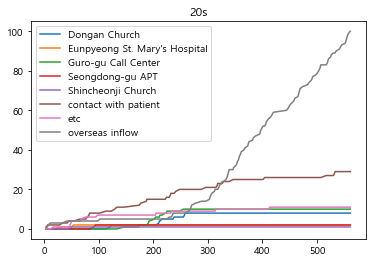

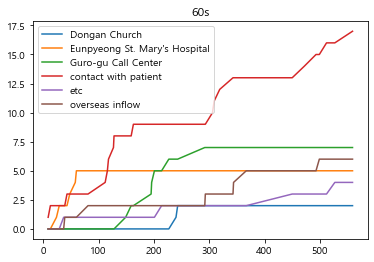

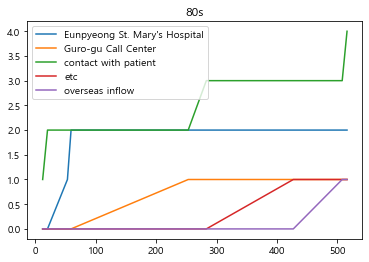

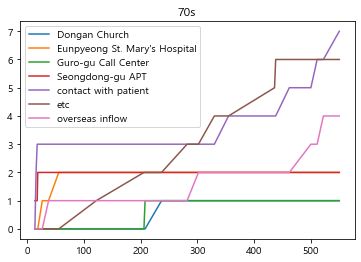

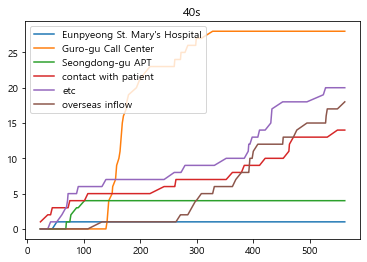

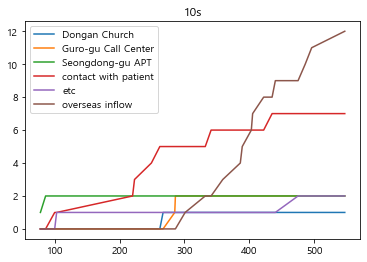

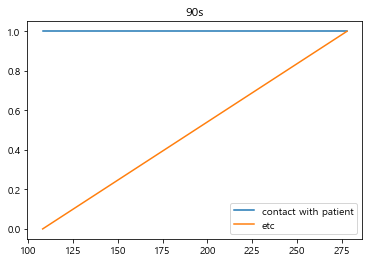

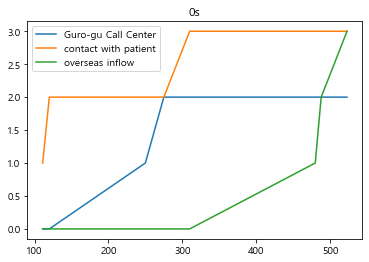

In [218]:
x = pinfo[pinfo['province']=='Seoul'][['confirmed_date','patient_id','infection_case','age']]
for col in x['age'].unique():
    pd.get_dummies(x[x['age']==col]['infection_case']).cumsum().plot()
    plt.title(col)

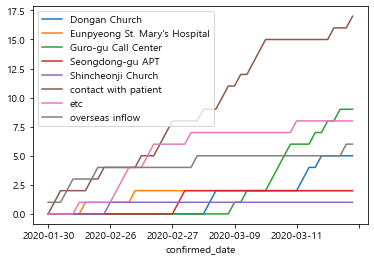

In [288]:
x = pinfo[pinfo['province']=='Seoul'][['confirmed_date','patient_id','infection_case','age']]
x.index = x['confirmed_date']
pd.get_dummies(x[x['age']=='20s']['infection_case']).cumsum().iloc[:50,:].plot()


In [267]:
x = pinfo[pinfo['province']=='Seoul'][['confirmed_date','patient_id','infection_case','age']]
xx = pd.get_dummies(x['age'])
xx.index = x['age'].index
data = xx.cumsum()
data.index = x['age'].index


fig = go.Figure()
for col in data.columns:
    fig.add_trace(go.Scatter(x=data.index,y= data[col],
                 mode='lines+markers', name=col))
# ... #
fig.update_layout(title='>', **layout_setting)
fig.show()

In [272]:
x = pinfo[pinfo['province']=='Seoul'][['confirmed_date','patient_id','infection_case','age']]
xx = pd.get_dummies(x['age'])
pd.concat([x, xx], axis=1)

,confirmed_date,patient_id,infection_case,age,0s,10s,20s,30s,40s,50s,60s,70s,80s,90s
0,2020-01-23,1000000001,overseas inflow,50s,0,0,0,0,0,1,0,0,0,0
1,2020-01-30,1000000002,overseas inflow,30s,0,0,0,1,0,0,0,0,0,0
2,2020-01-30,1000000003,contact with patient,50s,0,0,0,0,0,1,0,0,0,0
3,2020-01-30,1000000004,overseas inflow,20s,0,0,1,0,0,0,0,0,0,0
4,2020-01-31,1000000005,contact with patient,20s,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,2020-04-16,1000000620,contact with patient,NaN,0,0,0,0,0,0,0,0,0,0
620,2020-04-17,1000000621,overseas inflow,NaN,0,0,0,0,0,0,0,0,0,0
621,2020-04-17,1000000622,overseas inflow,NaN,0,0,0,0,0,0,0,0,0,0
622,2020-04-17,1000000623,overseas inflow,NaN,0,0,0,0,0,0,0,0,0,0


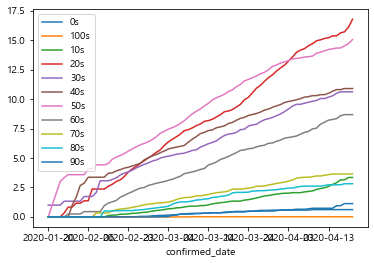

In [248]:
pinfo.pivot_table(index=['confirmed_date'])
x = pd.concat([pinfo, pd.get_dummies(pinfo['age'])],axis=1)
col = pd.get_dummies(pinfo['age']).columns
x.pivot_table(index='confirmed_date', values=col).cumsum().plot()

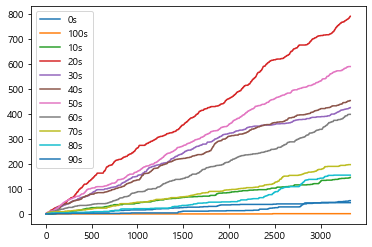

In [224]:
pd.get_dummies(pinfo['age']).cumsum().plot()

TypeError: no numeric data to plot

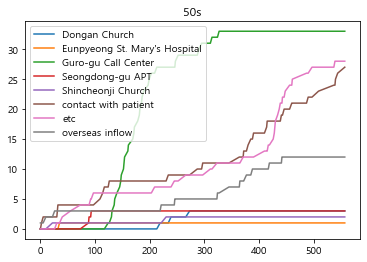

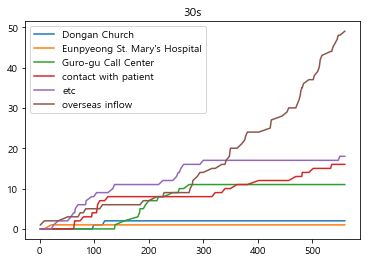

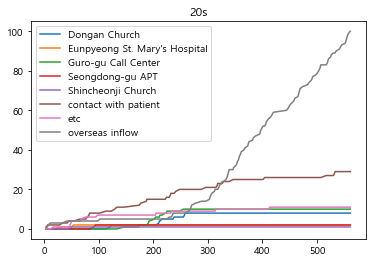

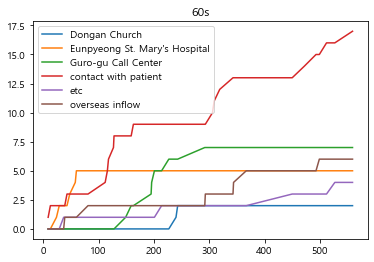

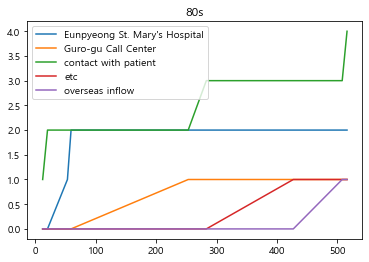

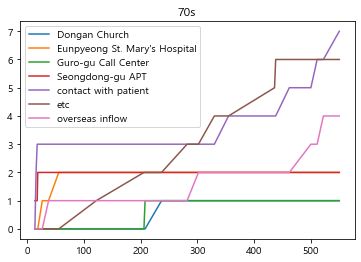

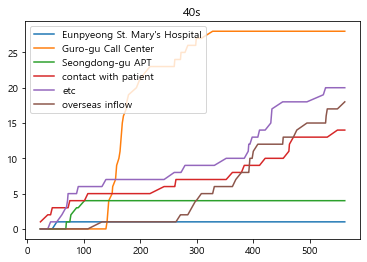

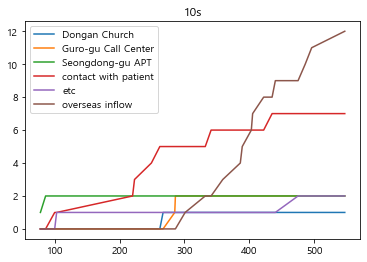

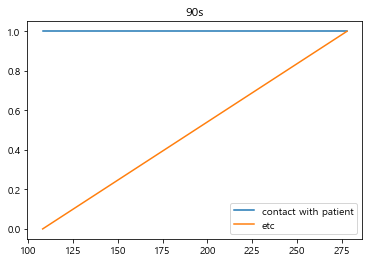

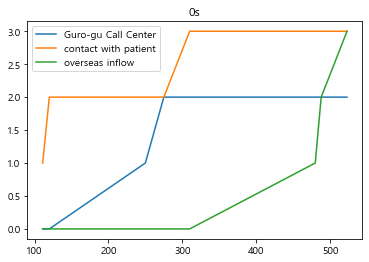

In [253]:
x = pinfo[pinfo['province']=='Seoul'][['confirmed_date','patient_id','infection_case','age']]
for col in x['age'].unique():
    pd.get_dummies(x[x['age']==col]['infection_case']).cumsum().plot()
    plt.title(col)

In [252]:
timeAge = pd.read_csv('TimeAge.csv')
timeAge_Date = timeAge.pivot_table(index = ['date'],columns=['age'], aggfunc=sum)
timeAge_Date['confirmed']

fig = go.Figure()
for col in timeAge_Date['confirmed'].columns:
    fig.add_trace(go.Scatter(x=timeAge_Date.index,y= timeAge_Date['confirmed'][col],
                 mode='lines+markers', name=col))
# ... #
fig.update_layout(title='>', **layout_setting)
fig.show()

In [126]:
pinfo

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3321,7000000009,9651.0,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3322,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3323,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7.000000e+09,5.0,NaN,2020-04-03,NaN,NaN,isolated
3324,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated
